## Import of Dataframe and necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sql_functions import get_dataframe
pd.set_option('display.max_columns', None)

## Import dataframe

In [2]:
from master_df import setup

df_master = setup()

df_master.fillna(0, inplace=True)

In [3]:
df_master

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,2018-11-07 00:00:00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0,0.00,0,0.00,2015-10-19 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12 00:00:00,78.93,"1,341.81",17.00,3.00,2023-03-15 00:00:00,0.00,...,0,0.00,0,0.00,0,8.00,4.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,2006-11-30 00:00:00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0,0.00,0,0.00,2022-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19 00:00:00,26.46,105.84,4.00,2.00,0,0.00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Quality of stock for a certain article to be assessed as "good" or "bad"


In [4]:
quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()
quality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()

quality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()
quality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()

quality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()
quality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()

quality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()
quality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()

quality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()
quality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()

quality_stock_good_straubing = df_master.query('str_lager > 0 and str_vk >= 3').reset_index()
quality_stock_bad_straubing = df_master.query('str_lager > 0 and str_vk < 3').reset_index()

quality_stock_good_passau = df_master.query('pas_lager > 0 and pas_vk >= 3').reset_index()
quality_stock_bad_passau = df_master.query('pas_lager > 0 and pas_vk < 3').reset_index()

quality_stock_good_landshut = df_master.query('lan_lager > 0 and lan_vk >= 3').reset_index()
quality_stock_bad_landshut = df_master.query('lan_lager > 0 and lan_vk < 3').reset_index()

quality_stock_good_mühldorf = df_master.query('müh_lager > 0 and müh_vk >= 3').reset_index()
quality_stock_bad_mühldorf = df_master.query('müh_lager > 0 and müh_vk < 3').reset_index()

quality_stock_good_rosenheim = df_master.query('ros_lager > 0 and ros_vk >= 3').reset_index()
quality_stock_bad_rosenheim = df_master.query('ros_lager > 0 and ros_vk < 3').reset_index()

In [5]:
quality_stock_bad_all

,level_0,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,...,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,14,430,Eberspächer Abgas,08.693.60,"K SET CORSA A 1,2I 33KW",0,0,1,L20,0,131.39,131.39,1.00,1.00,0,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,17,430,Eberspächer Abgas,08.683.73,"R CORSA A 1,3N/S/1,4",0,0,1,L20,0,8.76,8.76,1.00,1.00,0,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,20,430,Eberspächer Abgas,08.608.86,"N CORSA D 1,4L 66KW BJ 2006-",0,0,0,L20,2021-08-04 00:00:00,92.11,92.11,1.00,1.00,2021-08-04 00:00:00,...,0,0.00,2018-05-04 00:00:00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,21,430,Eberspächer Abgas,08.683.90,"B CORSA A 1,0S",0,0,1,L20,2016-07-13 00:00:00,4.74,9.48,2.00,2.00,2016-07-13 00:00:00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,24,430,Eberspächer Abgas,08.592.90,"B KADETT E 1,7D AB 1989",0,0,1,L20,0,19.26,57.78,3.00,3.00,0,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57919,357813,0,BOSCH,0986479E23,BREMSSCHEIBE,0,0,0,00RBABD,2019-10-16 00:00:00,105.60,211.20,2.00,2.00,0,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57920,357814,17,BREMICKER,403E35,ZÜNDLEITUNG,0,0,5,L64,2004-01-01 00:00:00,10.89,32.67,3.00,3.00,2004-01-01 00:00:00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57921,357817,0,BOSCH,0986479E39,BREMSSCHEIBE,0,N,0,00RBABA,2023-05-31 00:00:00,108.16,216.32,2.00,0.00,2023-05-31 00:00:00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57922,357821,17,BREMICKER,403E52,ZÜNDLEITUNG,0,0,5,L64,2010-01-05 00:00:00,11.22,11.22,1.00,1.00,2010-01-05 00:00:00,...,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Summary how much of the stock is sold per year (in %)

In [6]:
sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100

sales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100

sales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100

sales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100

sales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100

sales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100

sales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100

sales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0].count()) * 100

sales_of_stock_mühldorf = (df_master[df_master['müh_vk'] > 0].count() / df_master[df_master['müh_lager'] > 0].count()) * 100

sales_of_stock_rosenheim = (df_master[df_master['ros_vk'] > 0].count() / df_master[df_master['ros_lager'] > 0].count()) * 100

In [7]:
print(sales_of_stock_all['gesamt_lager'])

print(sales_of_stock_weiden['wen_lager'])

print(sales_of_stock_regensburg['rgb_lager'])

print(sales_of_stock_amberg['amb_lager'])

print(sales_of_stock_cham['cha_lager'])

print(sales_of_stock_straubing['str_lager'])

print(sales_of_stock_passau['pas_lager'])

print(sales_of_stock_landshut['lan_lager'])

print(sales_of_stock_mühldorf['müh_lager'])

print(sales_of_stock_rosenheim['ros_lager'])

85.14170411813262
56.87119675456389
346.4049079754601
406.1091340450771
1540.9937888198758
352.0904180836167
415.6904508342208
983.1526271893244
1245.9016393442623
425.3954305799649


## Visualization stock quality

In [8]:
#create quality_gesamt

""" PE_condition = [
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),
    (df_master['gesamt_lager'] <= 0)
]
PE_categories = ['Good', 'Bad', 'not in stock']
df_master['quality_gesamt'] = np.select(PE_condition, PE_categories) """

" PE_condition = [\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),\n    (df_master['gesamt_lager'] <= 0)\n]\nPE_categories = ['Good', 'Bad', 'not in stock']\ndf_master['quality_gesamt'] = np.select(PE_condition, PE_categories) "

In [9]:
#create new columns ti measure the quality

locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['Good', 'Bad', 'not in stock']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] >= 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3),
        (df_master[x+'_lager'] <= 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12 00:00:00,78.93,"1,341.81",17.00,3.00,2023-03-15 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,Good,Good,not in stock,not in stock,not in stock,Bad,not in stock,not in stock,not in stock,not in stock
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19 00:00:00,26.46,105.84,4.00,2.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,Bad,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock


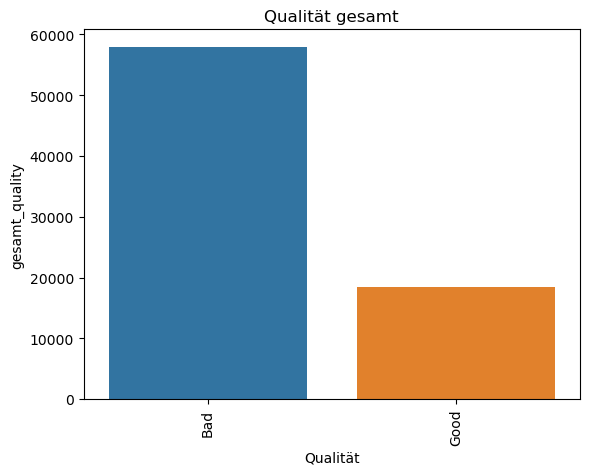

In [42]:
# Erstellen Sie das Balkendiagramm

df_master_gesamt = df_master.query('gesamt_quality == "Good" or gesamt_quality == "Bad"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität gesamt")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

sns.barplot(x=df_master_gesamt['gesamt_quality'].value_counts().index, y=df_master_gesamt['gesamt_quality'].value_counts(), data=df_master_gesamt)
plt.xticks(rotation=90)
plt.show()

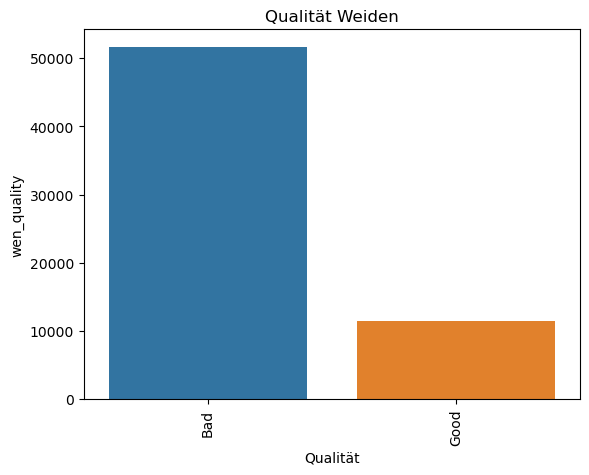

In [43]:
df_master_weiden = df_master.query('wen_quality == "Good" or wen_quality == "Bad"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Weiden")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

sns.barplot(x=df_master_weiden['wen_quality'].value_counts().index, y=df_master_weiden['wen_quality'].value_counts(), data=df_master_weiden)
plt.xticks(rotation=90)
plt.show()

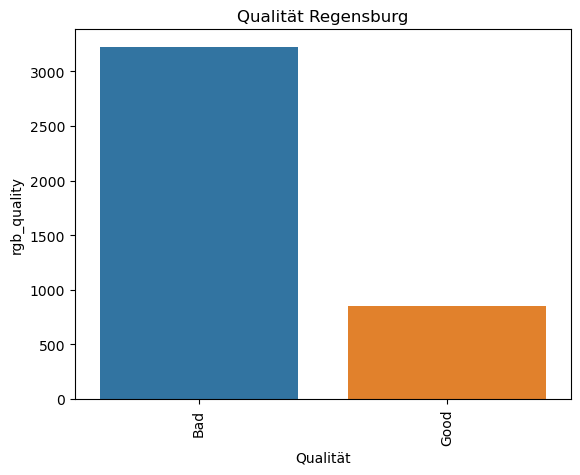

In [44]:
df_master_regensburg = df_master.query('rgb_quality == "Good" or rgb_quality == "Bad"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Regensburg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

sns.barplot(x=df_master_regensburg['rgb_quality'].value_counts().index, y=df_master_regensburg['rgb_quality'].value_counts(), data=df_master_weiden)
plt.xticks(rotation=90)
plt.show()

In [45]:
df_master_regensburg

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
203,430,Eberspächer Abgas,21.206.91,B E87 120I 110KW,0,0,1,L20,2017-07-27 00:00:00,20.51,20.51,1.00,0.00,0,1.00,...,0.00,0.00,0.00,0.00,0.00,Bad,not in stock,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
302,430,Eberspächer Abgas,12.328.90,B MONTAGESATZ VW PASSAT,0,0,1,L20,2022-08-16 00:00:00,2.30,27.60,12.00,9.00,2022-03-24 00:00:00,1.00,...,0.00,0.00,1.00,0.00,0.00,Bad,Bad,Bad,not in stock,not in stock,not in stock,Bad,not in stock,not in stock,Bad
303,430,Eberspächer Abgas,12.288.90,B GUMMIPUFFER VAG,0,0,1,L20,2023-02-03 00:00:00,0.44,23.76,54.00,44.00,2023-02-03 00:00:00,6.00,...,0.00,0.00,0.00,0.00,0.00,Bad,Bad,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,Bad,Bad
326,135,SKF,VKM61018,SPANNROLLE NEBENTRIEB TOYOTA,0,AP,0,LIE,2018-01-31 00:00:00,12.79,89.53,7.00,4.00,2016-03-23 00:00:00,3.00,...,0.00,0.00,0.00,0.00,0.00,Bad,Bad,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
349,135,SKF,VKM62065,MULTI-V-UMLENKROLLE NISSAN,0,T,0,LIE,2016-02-18 00:00:00,8.57,8.57,1.00,0.00,0,1.00,...,0.00,0.00,0.00,0.00,0.00,Bad,not in stock,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163412,263,Elring,128240,"WEDI 29,85X 47 X11,3 RD SP /AS",0,0,5,L03,2023-02-08 00:00:00,2.27,13.62,6.00,4.00,2023-02-08 00:00:00,1.00,...,0.00,0.00,0.00,-1.00,0.00,Bad,Bad,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
163479,263,Elring,128430,OPEL SD-ML ANS.KRœMMER,0,IP,5,L03,2021-09-08 00:00:00,3.85,3.85,1.00,0.00,2021-09-08 00:00:00,1.00,...,0.00,0.00,0.00,0.00,0.00,Bad,not in stock,Bad,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock,not in stock
163503,263,Elring,128503,"KU-RG. 22X27X1,5 VE 100",0,0,5,L03,2023-06-01 00:00:00,0.07,7.14,102.00,65.00,2023-06-01 00:00:00,2.00,...,4.00,2.00,4.00,1.00,8.00,Good,Good,Good,Good,not in stock,Good,Good,not in stock,not in stock,Good
163692,263,Elring,129780,WEDI AUDI A2/A3/... AS PTFE/AC,0,0,5,L03,2023-05-31 00:00:00,3.67,66.06,18.00,2.00,2023-05-31 00:00:00,1.00,...,1.00,1.00,1.00,1.00,1.00,Good,Good,Bad,Bad,not in stock,Good,Bad,not in stock,not in stock,Bad


## Visualisation inventory management